<a href="https://colab.research.google.com/github/feracor/Curso-de-Algebra-Lineal-Aplicada-para-Machine-Learning/blob/main/Algebra_Lineal_Aplicada_para_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Curso de Álgebra Lineal Aplicada para Machine Learning - 2022


# **2- Podemos y debemos pensar a las matrices como transformaciones lineales**


In [58]:
%matplotlib inline    
import numpy as np
import matplotlib.pyplot as plt

In [59]:
A = np.array([[-1,3],[2,-2]])
A

array([[-1,  3],
       [ 2, -2]])

In [60]:
vector = np.array([[2],[1]])
vector

array([[2],
       [1]])

In [61]:
#funcion para graficar vectores
def graficarVectores(vecs, cols, alpha = 1):
  plt.axvline(x = 0, color = 'red', zorder = 0)
  plt.axhline(y = 0, color = 'grey', zorder = 0)

  for i in range(len(vecs)):
    x =  np.concatenate([[0,0], vecs[i]])
    plt.quiver ([x[0]],
                [x[1]],
                [x[2]],
                [x[3]],
                angles = 'xy', scale_units = 'xy',
                scale= 1,
                color = cols[i],
                alpha = alpha
                )

In [62]:
print(vector)
print(vector.flatten())

[[2]
 [1]]
[2 1]


In [63]:
print(A)
print(A.flatten())

[[-1  3]
 [ 2 -2]]
[-1  3  2 -2]


(-0.5, 2.0)

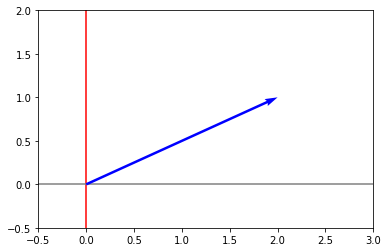

In [64]:
graficarVectores([vector.flatten()], cols = 'blue')

plt.xlim(-0.5,3)
plt.ylim(-0.5,2)

In [65]:
vector_transformado = A.dot(vector)
vector_transformado

array([[1],
       [2]])

(-0.5, 2.5)

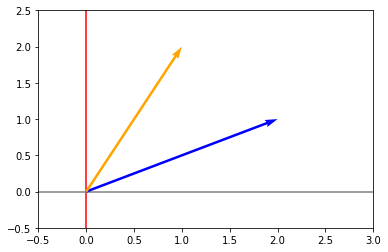

In [66]:
graficarVectores([vector.flatten(),vector_transformado.flatten()], 
                 cols = ['blue', 'orange'])
plt.xlim(-0.5,3)
plt.ylim(-0.5,2.5)

In [67]:
print(np.linalg.det(A)) # Calcular determinante

-4.0


In [68]:
print(np.linalg.norm(vector)) # Verificar norma del vesctor
print(np.linalg.norm(vector_transformado)) # Verificar norma del vesctor

2.23606797749979
2.23606797749979


# **3 - Autovalores y Autovectores**


In [69]:
#Definir colores
orange_light = '#FF9A13'
blue_light = '#1190FF'

In [70]:
#definir matriz
X = np.array([[3,2],[4,1]])
print(X)

[[3 2]
 [4 1]]


In [71]:
# Definir vector
v= np.array([[1],[1]])
v

array([[1],
       [1]])

In [72]:
#Vector trandormado
u = X.dot(v) #Producto interno
u

array([[5],
       [5]])

(-1.0, 6.0)

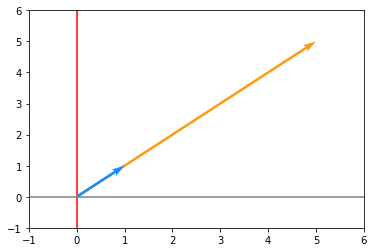

In [73]:
graficarVectores([u.flatten(), v.flatten()], cols = [orange_light, blue_light])

plt.xlim(-1,6)
plt.ylim(-1,6)


In [74]:
# Un auto vector es aquel que cuando se le aplica una matriz, devuelve un vector en la misma direccion pero con su magnitud amplificada

lamda_1 = 5
lamda_1 * v

array([[5],
       [5]])

In [75]:
s = np.array ([[-1],[2]])
s

array([[-1],
       [ 2]])

In [76]:
t = X.dot(s)
t

array([[ 1],
       [-2]])

(-3.0, 3.0)

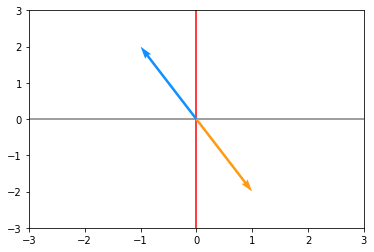

In [77]:
graficarVectores([t.flatten(), s.flatten()], cols = [orange_light, blue_light])

plt.xlim(-3,3)
plt.ylim(-3,3)


# 4 - Cómo calcular los autovalores y autovectores

In [78]:
#Definir una matriz para hllar autovalores y auto vectores
X = np.array ([[3,2],[4,1]])
X

array([[3, 2],
       [4, 1]])

In [79]:
np.linalg.eig(X)

(array([ 5., -1.]), array([[ 0.70710678, -0.4472136 ],
        [ 0.70710678,  0.89442719]]))

In [80]:
autovalores, autovectores = np.linalg.eig(X)
autovalores

array([ 5., -1.])

In [81]:
autovectores[:,0]

array([0.70710678, 0.70710678])

In [82]:
autovectores[:,1]

array([-0.4472136 ,  0.89442719])

In [83]:
v = np.array([[-1],[2]])
Xv = X.dot(v)
v_np = autovectores[:,1]

(-7.0, 3.0)

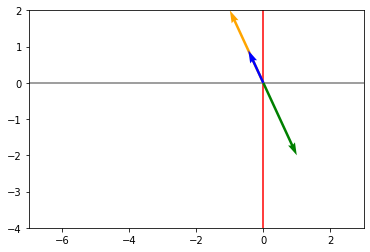

In [84]:
graficarVectores([Xv.flatten(), v.flatten(), v_np], cols = ['green', 'orange', 'blue'])

plt.ylim(-4,2)
plt.xlim(-7,3)


# 5 - Descomposición de matrices

In [85]:
A = np.array([[3,2],[4,1]])
A

array([[3, 2],
       [4, 1]])

In [86]:
autovalores, autovectores = np.linalg.eig(A)

In [87]:
print(autovalores)
print(autovectores)

[ 5. -1.]
[[ 0.70710678 -0.4472136 ]
 [ 0.70710678  0.89442719]]


In [88]:
A_cal = autovectores.dot(np.diag(autovalores)).dot(np.linalg.inv(autovectores))
A_cal

array([[3., 2.],
       [4., 1.]])

In [89]:
A  = np.array([[3,2],[2,3]])
A

array([[3, 2],
       [2, 3]])

In [90]:
# Comprobar la que la matriz coincida con su transpuesta
print(A == A.T)

[[ True  True]
 [ True  True]]


In [91]:
autovalores, autovectores = np.linalg.eig(A)
print(autovalores)
print(autovectores)

[5. 1.]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


In [92]:
# Se puede rescibir una matriz simetrica
# calcular un transpouesta es mas sencillo y economico que calcular una inversa, aplica para matrices simetricas

A_cal = autovectores.dot(np.diag(autovalores)).dot(autovectores.T)
A_cal

array([[3., 2.],
       [2., 3.]])

# 6 - ¿Cómo descompongo una matriz no cuadrada (SVD)?


In [93]:
A = np.array([[1,2,3],[3,4,5]])
A

array([[1, 2, 3],
       [3, 4, 5]])

In [94]:
U, D, V = np.linalg.svd(A)

In [95]:
print(U) # matriz de 2x2
print('---')
print(np.diag(D)) # se debe escrivir los valores que se solicitna con matriz y valores en la diagonal y el resto son ceros
print('---')
print(V)  # Matriz de 3x3


[[-0.46410668 -0.88577931]
 [-0.88577931  0.46410668]]
---
[[7.97638869 0.        ]
 [0.         0.61418515]]
---
[[-0.39133557 -0.5605708  -0.72980603]
 [ 0.8247362   0.13817999 -0.54837623]
 [ 0.40824829 -0.81649658  0.40824829]]


In [96]:
# A = U * D * V

# 7 - Las tres transformaciones

In [97]:
# Crear funcion para crear graficas

def graficarMatriz(matriz, vectorCol = ['red', 'blue']):

  #circulo unitario
  x = np.linspace(-1, 1, 100000)
  y = np.sqrt(1-(x**2))

  # Circulo unitario transformado
  x1 = matriz[0,0] * x + matriz[0,1] * y #ajuste de posicion en coordenada 0,0, positivo
  y1 = matriz[1,0] * x + matriz[1,1] * y #ajuste de posicion en coordenada 1,0, positivo
  x1_neg = matriz[0,0] * x - matriz[0,1] * y #ajuste de posicion en coordenada 0,0, negativo
  y1_neg = matriz[1,0] * x - matriz[1,1] * y #ajuste de posicion en coordenada 0,0, negativo

  #Vectores que generan el espacio
  u1 = [matriz[0,0], matriz[1,0]]
  v1 = [matriz[0,1], matriz[1,1]]

  graficarVectores([u1, v1], cols = [vectorCol[0], vectorCol[1]])

  plt.plot(x1, y1, 'green', alpha = 0.7) # alpha es el nivel de transparencia
  plt.plot(x1_neg, y1_neg, 'green', alpha = 0.7)


In [98]:
A =  np.array([[3,7], [5,2]])
A

array([[3, 7],
       [5, 2]])

Circulo unitario


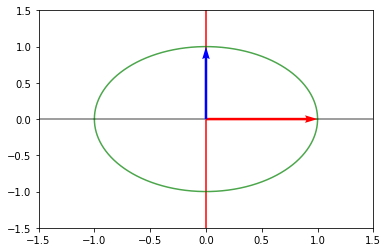

Circulo unitario transformado


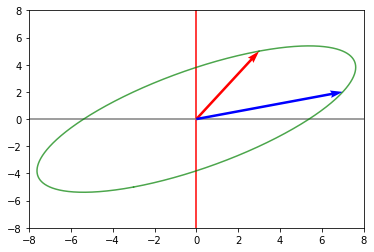

In [99]:
print('Circulo unitario')
graficarMatriz(np.array([[1,0], [0,1]]))

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

print('Circulo unitario transformado')
graficarMatriz(A)

plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

# 8 - Aplicación de las matrices D y V y U y su efecto en la transformación

In [100]:
U, D, V = np.linalg.svd(A)
U

array([[-0.85065081, -0.52573111],
       [-0.52573111,  0.85065081]])

Circulo unitario


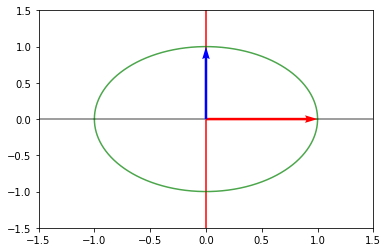

Primer rotacion V


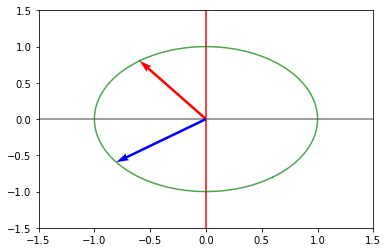

Escalar D


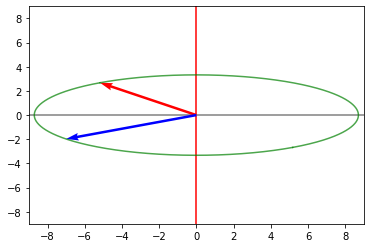

Segunda rotacion U


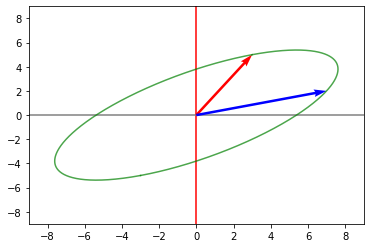

In [101]:
# Primer transformacion es V, que efectua una rotacion
# Segunda transformaion es D, que aumenta o reduce el espacio

print('Circulo unitario')
graficarMatriz(np.array([[1,0], [0,1]]))

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

print('Primer rotacion V')
graficarMatriz(V)

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

print('Escalar D')
graficarMatriz(np.diag(D).dot(V))

plt.xlim(-9, 9)
plt.ylim(-9, 9)
plt.show()

print('Segunda rotacion U')
graficarMatriz(U.dot(np.diag(D).dot(V)))

plt.xlim(-9, 9)
plt.ylim(-9, 9)
plt.show()

# 9 - ¿Cómo interpretar los valores singulares?

In [103]:
A = np.array([[3, 7], [5, 2]])
A

array([[3, 7],
       [5, 2]])

In [110]:
U, D, V = np.linalg.svd(A)

print(D[0])
print(D[1])

8.7133796929634
3.3282148858288965


array([[-0.59455781, -0.80405286],
       [ 0.80405286, -0.59455781]])

In [111]:
u1 = [D[0]*U[0,0], D[0]*U[0,1]]
v1 = [D[1]*U[1,0], D[1]*U[1,1]]

print([A[0,0], A[1,0]])
print(u1)
print()
print([A[0,1], A[1,1]])
print(v1)
print()

[3, 5]
[-7.4120434792975685, -4.580894796297923]

[7, 2]
[-1.7497461132982814, 2.8311486829996433]



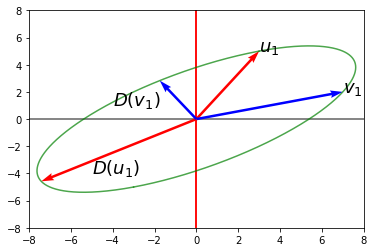

In [119]:
graficarMatriz(A)
graficarVectores([u1, v1], cols = ['red', 'blue'])

plt.text(3, 5, r'$u_1$', size = 18)
plt.text(7, 2, r'$v_1$', size = 18)

plt.text(-5, -4, r'$D(u_1)$', size = 18)
plt.text(-4, 1, r'$D(v_1)$', size = 18)

plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

# 10 - Una imagen es una matriz


In [123]:
 from PIL import Image
 from six.moves import urllib

In [121]:
plt.style.use('classic')

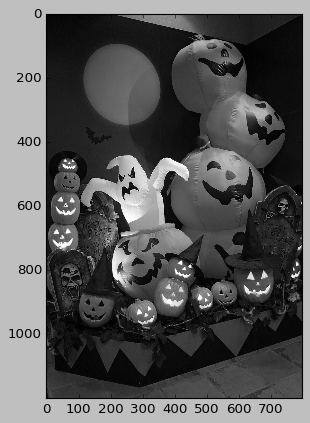

In [124]:
img = Image.open(urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/Kobe_Mosaic15s3072.jpg/800px-Kobe_Mosaic15s3072.jpg')).convert('LA')
plt.imshow(img)

In [125]:
img_gr = img.convert('LA') #convertir a escala de grises
print(img_gr)

<PIL.Image.Image image mode=LA size=800x1200 at 0x7FD9A5F2F810>


In [126]:
img_matriz = np.array(list(img_gr.getdata(band = 0)), float)
print(img_matriz)

[ 5.  5.  5. ... 80. 80. 80.]


In [127]:
img_matriz.shape =(img_gr.size [1], img_gr.size [0])
print(img_matriz)

[[ 5.  5.  5. ... 41. 25.  6.]
 [ 4.  4.  4. ...  8.  8. 12.]
 [ 4.  4.  4. ... 11.  6.  5.]
 ...
 [67. 57. 48. ... 79. 81. 82.]
 [73. 68. 58. ... 79. 80. 81.]
 [65. 66. 57. ... 80. 80. 80.]]


In [129]:
print(img_matriz.shape) # muestra dimensiones (FILAS, COLUMNAS)

(1200, 800)


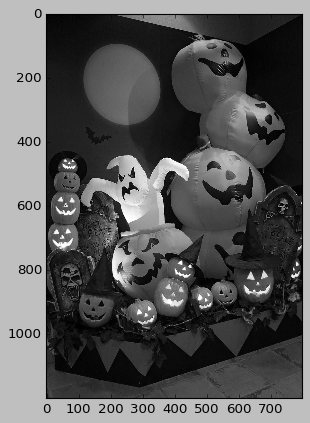

In [140]:
plt.imshow(img_matriz, cmap = 'gray')
plt.show()

In [136]:
img2_matr_2 = img_matriz / 10
print(img2_matr_2)

[[0.5 0.5 0.5 ... 4.1 2.5 0.6]
 [0.4 0.4 0.4 ... 0.8 0.8 1.2]
 [0.4 0.4 0.4 ... 1.1 0.6 0.5]
 ...
 [6.7 5.7 4.8 ... 7.9 8.1 8.2]
 [7.3 6.8 5.8 ... 7.9 8.  8.1]
 [6.5 6.6 5.7 ... 8.  8.  8. ]]


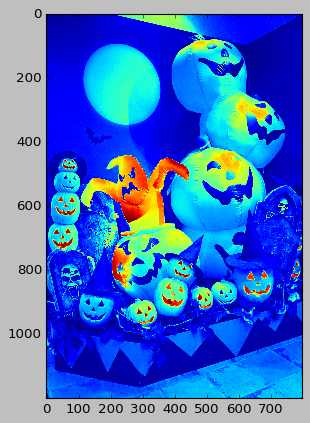

In [138]:
plt.imshow(img2_matr_2)
plt.show()

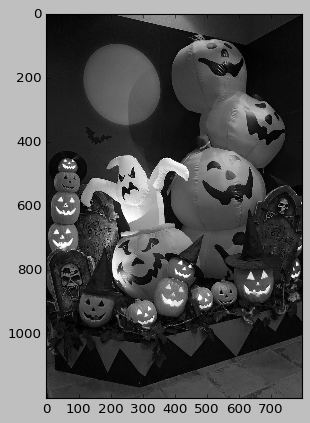

In [141]:
plt.imshow(img2_matr_2, cmap = 'gray')
plt.show()

In [142]:
print(np.max(img2_matr_2)) # ver valores maximos dentro de la matriz de imagenes
print(np.max(img_matriz))

25.5
255.0


In [143]:
print(np.min(img2_matr_2)) # ver valores minimos dentro de la matriz de imagenes
print(np.min(img_matriz))

0.0
0.0


# 11 - Apliquemos la descomposición SVD a una imagen